# SMAI (CSE 471) Assignment 1 : Decision Tree Classifier

### Name : Manojit Chakraborty
### Course : MTech CSIS
### Roll No : 2018201032 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.10,0.90,7,286,4,0,1,0,sales,low
1,0.89,0.93,4,249,3,0,0,0,sales,low
2,0.38,0.50,2,132,3,0,1,0,accounting,low
3,0.95,0.71,4,151,4,0,0,0,sales,medium
4,0.84,0.84,5,163,3,0,0,0,technical,low


In [4]:
cols = list(df)
cols.insert(0, cols.pop(cols.index('left')))
df1 = df.ix[:, cols]
df2 = df1.replace({'salary' : { 'low': 1, 'medium': 2, 'high' :3}})
df3 = df2.replace({'sales' : {'sales' : 1, 'technical' : 2, 'support' :3, 'IT' :4, 
                            'product_mng' : 5, 'marketing' : 6, 'RandD' :7, 
                            'accounting' :8, 'hr' : 9, 'management' : 10}})

## Part 1. Train decision tree only on categorical data. Report precision, recall, f1 score and accuracy.

In [5]:
X_cat=df3[["number_project","time_spend_company","Work_accident","promotion_last_5years","salary","sales"]]
y_cat=df3.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X_cat, y_cat, test_size=0.20)

### Using Decision Tree Classifier from Scikit-learn

In [6]:
def prediction_model(model):
    mdl=model(random_state = 300,criterion="entropy")
    #mdl=model()
    dtree = mdl.fit(X_train,y_train)
    y_pred_train=mdl.predict(X_train)
    accuracy_mdl=accuracy_score(y_train,y_pred_train)
    conf_matrix=confusion_matrix(y_train,y_pred_train)
    print('Training accuracy score :',round(accuracy_mdl*100,2),'%')
    y_pred=mdl.predict(X_test)
    accuracy_mdl=accuracy_score(y_test,y_pred)
    conf_matrix=confusion_matrix(y_test,y_pred)
    print('Validation accuracy score :',round(accuracy_mdl*100,2),'%')
    print(conf_matrix)
    print(classification_report(y_test,y_pred))
    return dtree

print('Decision Tree Classifier Using Scikit-Learn')
dtree=prediction_model(DecisionTreeClassifier)

Decision Tree Classifier Using Scikit-Learn
Training accuracy score : 93.5 %
Validation accuracy score : 91.24 %
[[1603  117]
 [  80  448]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1720
           1       0.79      0.85      0.82       528

   micro avg       0.91      0.91      0.91      2248
   macro avg       0.87      0.89      0.88      2248
weighted avg       0.91      0.91      0.91      2248



### Using own Decision Tree Classifier

In [7]:
from DecisionTree import *
dt = DecisionTree(method="ID3", measure="entropy",max_depth=2)
dtree1=dt.fit(X_train, y_train)
y_pred_train=dt.predict(X_train)
accuracy_mdl=accuracy_score(y_train,y_pred_train)
conf_matrix=confusion_matrix(y_train,y_pred_train)
print('Training accuracy score :',round(accuracy_mdl*100,2),'%')
y_pred = dt.predict(X_test)
accuracy_mdl=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
print('Validation accuracy score :',round(accuracy_mdl*100,2),'%')
print(conf_matrix)
print(classification_report(y_test,y_pred))
#print(dt.cnt)
#dt.exportTree()

Training accuracy score : 91.51 %
Validation accuracy score : 91.41 %
[[1587  133]
 [  60  468]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1720
           1       0.78      0.89      0.83       528

   micro avg       0.91      0.91      0.91      2248
   macro avg       0.87      0.90      0.89      2248
weighted avg       0.92      0.91      0.92      2248



## Part 2. Train the decision tree with categorical and numerical features. Report precision, recall, f1 score and accuracy

### Using Decision Tree Classifier from Scikit-learn

In [8]:
X=df3.iloc[:,1:10]
y=df3.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20)

def prediction_model(model):
    mdl=model(random_state=1000)
    dtree = mdl.fit(X_train,y_train)
    y_pred_train=mdl.predict(X_train)
    accuracy_mdl=accuracy_score(y_train,y_pred_train)
    conf_matrix=confusion_matrix(y_train,y_pred_train)
    print('Training accuracy score :',round(accuracy_mdl*100,2),'%')
    y_pred=mdl.predict(X_test)
    accuracy_mdl=accuracy_score(y_test,y_pred)
    conf_matrix=confusion_matrix(y_test,y_pred)
    print('Validation accuracy score :',round(accuracy_mdl*100,2),'%')
    print(conf_matrix)
    print(classification_report(y_test,y_pred))
    return dtree

print('Decision Tree Classifier Using Scikit-Learn')
dtree=prediction_model(DecisionTreeClassifier)


Decision Tree Classifier Using Scikit-Learn
Training accuracy score : 100.0 %
Validation accuracy score : 97.42 %
[[1713   32]
 [  26  477]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1745
           1       0.94      0.95      0.94       503

   micro avg       0.97      0.97      0.97      2248
   macro avg       0.96      0.96      0.96      2248
weighted avg       0.97      0.97      0.97      2248



### Using Own Decision Tree Classifier

In [9]:
df3["promotion_last_5years"]=df3["promotion_last_5years"].astype(str)
df3["Work_accident"]=df3["Work_accident"].astype(str)
df3["number_project"] = df3["number_project"].astype(str)
X=df3.iloc[:,1:10]
y=df3.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20,random_state=1200)

In [10]:
from DecisionTree import *
train_acc=[]
val_acc=[]
node=[]
for i in range(1,11):
    print("Max Depth = "+str(i))
    dt = DecisionTree(method="C4.5", measure="entropy",max_depth=i)
    dtree1=dt.fit(X_train, y_train)
    y_pred_train=dt.predict(X_train)
    accuracy_mdl=accuracy_score(y_train,y_pred_train)
    conf_matrix=confusion_matrix(y_train,y_pred_train)
    train_acc.append(round(accuracy_mdl*100,2))
    print('Training accuracy score :',round(accuracy_mdl*100,2),'%')
    y_pred = dt.predict(X_test)
    accuracy_mdl=accuracy_score(y_test,y_pred)
    conf_matrix=confusion_matrix(y_test,y_pred)
    val_acc.append(round(accuracy_mdl*100,2))
    print('Validation accuracy score :',round(accuracy_mdl*100,2),'%')
    print(conf_matrix)
    print(classification_report(y_test,y_pred))
    #dt.exportTree()
    node.append(dt.cnt)

Max Depth = 1
Training accuracy score : 84.17 %
Validation accuracy score : 84.21 %
[[1492  212]
 [ 143  401]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1704
           1       0.65      0.74      0.69       544

   micro avg       0.84      0.84      0.84      2248
   macro avg       0.78      0.81      0.79      2248
weighted avg       0.85      0.84      0.85      2248

Max Depth = 2
Training accuracy score : 92.29 %
Validation accuracy score : 91.99 %
[[1612   92]
 [  88  456]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1704
           1       0.83      0.84      0.84       544

   micro avg       0.92      0.92      0.92      2248
   macro avg       0.89      0.89      0.89      2248
weighted avg       0.92      0.92      0.92      2248

Max Depth = 3
Training accuracy score : 95.65 %
Validation accuracy score : 95.69 %
[[1650   54]
 [  43  501]]
             

### Observation :
#### Here we can see that the highest validation accuracy comes when max_depth = 5, and the corresponding validation accuracy is 97.64 %, where as the precision, recall and F1-score is 0.98 in this case .

## Part 3. Contrast the effectiveness of Misclassification rate, Gini, Entropy as impurity measures in terms of precision, recall and accuracy.

### Using Misclassification Rate as impurity measure :

In [11]:
dt = DecisionTree(method="C4.5", measure="misclass",max_depth=5)
dtree1=dt.fit(X_train, y_train)
y_pred_train=dt.predict(X_train)
accuracy_mdl=accuracy_score(y_train,y_pred_train)
conf_matrix=confusion_matrix(y_train,y_pred_train)
print('Training accuracy score :',round(accuracy_mdl*100,2),'%')
y_pred = dt.predict(X_test)
accuracy_mdl=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
print('Validation accuracy score :',round(accuracy_mdl*100,2),'%')
print(conf_matrix)
print(classification_report(y_test,y_pred))

Training accuracy score : 96.13 %
Validation accuracy score : 96.31 %
[[1694   10]
 [  73  471]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1704
           1       0.98      0.87      0.92       544

   micro avg       0.96      0.96      0.96      2248
   macro avg       0.97      0.93      0.95      2248
weighted avg       0.96      0.96      0.96      2248



### Using Gini Index as impurity measure :

In [12]:
dt = DecisionTree(method="C4.5", measure="gini",max_depth=5)
dtree1=dt.fit(X_train, y_train)
y_pred_train=dt.predict(X_train)
accuracy_mdl=accuracy_score(y_train,y_pred_train)
conf_matrix=confusion_matrix(y_train,y_pred_train)
print('Training accuracy score :',round(accuracy_mdl*100,2),'%')
y_pred = dt.predict(X_test)
accuracy_mdl=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
print('Validation accuracy score :',round(accuracy_mdl*100,2),'%')
print(conf_matrix)
print(classification_report(y_test,y_pred))

Training accuracy score : 97.68 %
Validation accuracy score : 97.42 %
[[1689   15]
 [  43  501]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1704
           1       0.97      0.92      0.95       544

   micro avg       0.97      0.97      0.97      2248
   macro avg       0.97      0.96      0.96      2248
weighted avg       0.97      0.97      0.97      2248



### Using Entropy as impurity measure :

In [13]:
dt = DecisionTree(method="C4.5", measure="entropy",max_depth=5)
dtree1=dt.fit(X_train, y_train)
y_pred_train=dt.predict(X_train)
accuracy_mdl=accuracy_score(y_train,y_pred_train)
conf_matrix=confusion_matrix(y_train,y_pred_train)
print('Training accuracy score :',round(accuracy_mdl*100,2),'%')
y_pred = dt.predict(X_test)
accuracy_mdl=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
print('Validation accuracy score :',round(accuracy_mdl*100,2),'%')
print(conf_matrix)
print(classification_report(y_test,y_pred))
#dt.exportTree()

Training accuracy score : 97.61 %
Validation accuracy score : 97.64 %
[[1695    9]
 [  44  500]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1704
           1       0.98      0.92      0.95       544

   micro avg       0.98      0.98      0.98      2248
   macro avg       0.98      0.96      0.97      2248
weighted avg       0.98      0.98      0.98      2248



### Observation :
#### So, we can see that the accuracy values for different impurity measures are like this : Misclassifiction Rate < Gini Index < Entropy Measure

## Part 4. Visualise training data on a 2-dimensional plot taking one feature (attribute) on one axis and other feature on another axis. Take two suitable features to visualise decision tree boundary

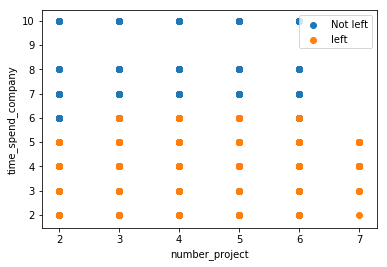

In [14]:
plot1=df[["number_project","time_spend_company","left"]]
plot2=plot1[plot1["left"]==1]
plot2
plot3=plot1[plot1["left"]==0]
plot3
plt.scatter(plot3["number_project"],plot3["time_spend_company"],label="Not left")
plt.scatter(plot2["number_project"],plot2["time_spend_company"],label="left")
plt.xlabel("number_project")
plt.ylabel("time_spend_company")
plt.legend(loc="best")
plt.show()

## Part 5a. Plot a graph of training and validation error with respect to depth of my decision tree

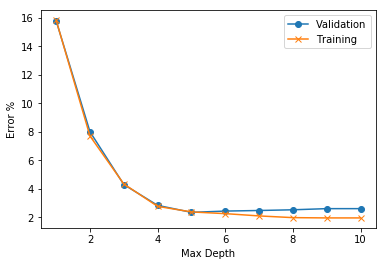

In [15]:
val_acc=100-np.array(val_acc)
train_acc=100-np.array(train_acc)
plt.plot(range(1,11),val_acc,"o-",label="Validation")
plt.plot(range(1,11),train_acc,"x-",label="Training")
plt.xlabel("Max Depth")
plt.ylabel("Error %")
plt.legend(loc="best")
plt.show()

## Part 5b. Plot a graph of training and validation error with respect to number of nodes of my decision tree


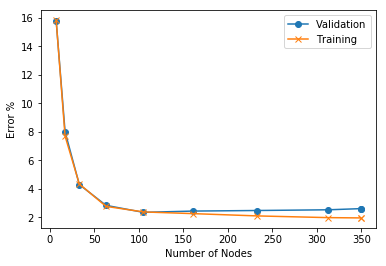

In [16]:
plt.plot(node,val_acc,"o-",label="Validation")
plt.plot(node,train_acc,"x-",label="Training")
plt.xlabel("Number of Nodes")
plt.ylabel("Error %")
plt.legend(loc="best")
plt.show()

## Part 6. Explain how decision tree is suitable handle missing values(few attributes missing in test samples) in data.

### There are a few methods by which Decision Tree suitably deals with missing values during testing :-

### A. Imputation

Imputation a class of methods by which an estimation of missing value or of its distribution
is used to generate prediction. 
An unknown value is replaced by an estimation of the value. 
![title](1.png)

### B. C4.5 Strategy 

In this approach, the distribution of possible missing value
is estimated and corresponding model predictions are
combined probabilistically. At the time of testing, a test
instance with missing value is split into branches according
to the portions of training examples falling into those
branches and goes down to leaves. 

### C. Lazy Decision Tree (Reduced Feature Models/Known Value Strategy)

Friedman suggested lazy decision tree approach where
the prediction model is constructed at testing time based on
the available test instance values. This is also known as
‘Known values strategy’. During tree construction it uses
only attributes whose values are known at testing. Hence it
naturally handles the missing values at testing. The main
drawback of this approach is its high computational cost as
different trees may be constructed for different test examples.
We can also save few trees and make use of it at running
time.
![title](2.png)

### D. Null Strategy

In Null Value strategy as discussed in training time, ‘Null’
is considered as a special value both at training and testing
time.

## Custom Testing :

### For testing against purely unseen test data, do the following in the terminal :

python3 DecisionTree.py train.csv test.csv